In [2]:
__author__ = "Farzaneh Soltanzadeh"
__email__ = "f.soltanzadeh.f@gmail.com"
__organization__ = "Coursera"
__date__ = "2024-12"

Import Libraries 📚

In [3]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import logging
import plotly.graph_objs as go
from sklearn.utils import shuffle
from sklearn.model_selection import train_test_split
import plotly.express as px
from wordcloud import WordCloud

logging.basicConfig(level=logging.INFO, format='%(asctime)s - %(levelname)s - %(message)s')

### Dataset 📦 

In [4]:
df = pd.read_csv('Data/laptop_price - dataset.csv')
print(len(df))
df.head()

1275


,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60


In [5]:
df.describe()

,Inches,CPU_Frequency (GHz),RAM (GB),Weight (kg),Price (Euro)
count,1275.000000,1275.000000,1275.000000,1275.000000,1275.000000
mean,15.022902,2.302980,8.440784,2.040525,1134.969059
std,1.429470,0.503846,5.097809,0.669196,700.752504
min,10.100000,0.900000,2.000000,0.690000,174.000000
25%,14.000000,2.000000,4.000000,1.500000,609.000000
50%,15.600000,2.500000,8.000000,2.040000,989.000000
75%,15.600000,2.700000,8.000000,2.310000,1496.500000
max,18.400000,3.600000,64.000000,4.700000,6099.000000


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1275 entries, 0 to 1274
Data columns (total 15 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   Company              1275 non-null   object 
 1   Product              1275 non-null   object 
 2   TypeName             1275 non-null   object 
 3   Inches               1275 non-null   float64
 4   ScreenResolution     1275 non-null   object 
 5   CPU_Company          1275 non-null   object 
 6   CPU_Type             1275 non-null   object 
 7   CPU_Frequency (GHz)  1275 non-null   float64
 8   RAM (GB)             1275 non-null   int64  
 9   Memory               1275 non-null   object 
 10  GPU_Company          1275 non-null   object 
 11  GPU_Type             1275 non-null   object 
 12  OpSys                1275 non-null   object 
 13  Weight (kg)          1275 non-null   float64
 14  Price (Euro)         1275 non-null   float64
dtypes: float64(4), int64(1), object(10)
me

Data Cleaning

In [7]:
df.isna().sum()

Company                0
Product                0
TypeName               0
Inches                 0
ScreenResolution       0
CPU_Company            0
CPU_Type               0
CPU_Frequency (GHz)    0
RAM (GB)               0
Memory                 0
GPU_Company            0
GPU_Type               0
OpSys                  0
Weight (kg)            0
Price (Euro)           0
dtype: int64

In [8]:
df.duplicated().sum()

0

Handle Outliers

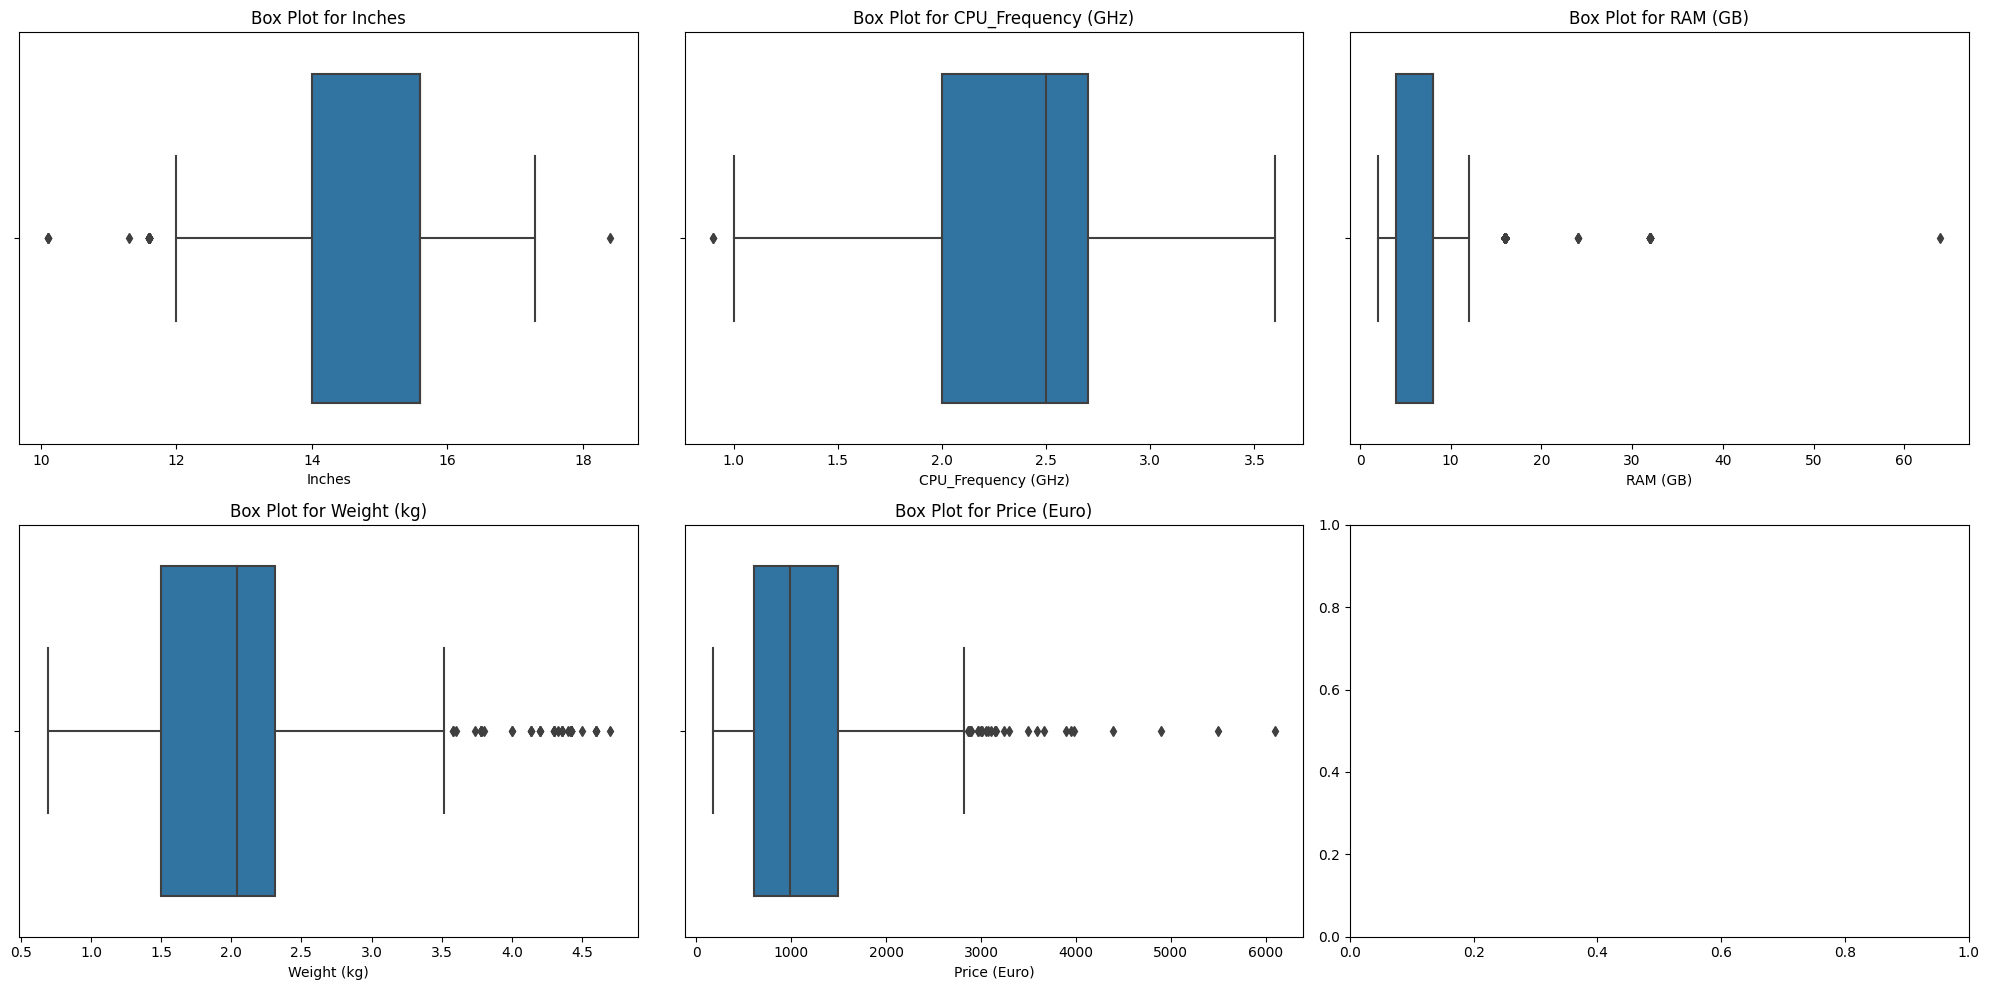

In [9]:
numerical_columns = df.select_dtypes(include=['number']).columns 

n_cols = (len(numerical_columns) + 1) // 2  
fig, axes = plt.subplots(nrows=2, ncols=n_cols, figsize=(20, 10))
axes = axes.flatten() # for easier iteration

for i, col in enumerate(numerical_columns):
    axes[i].set_title(f'Box Plot for {col}')
    sns.boxplot(x=df[col], ax=axes[i])
    
plt.tight_layout()
plt.show()


In [10]:
# for col in numerical_columns.drop('RAM (GB)'):
#     q1, q3= np.quantile(df[col],q = [0.25, 0.75])
#     iqr = q3 - q1
#     outlier_index = df[~((q1 - 1.5*iqr <= df[col]) & (df[col]<= q3 + 1.5*iqr))].index
#     print(f"{len(outlier_index)} outliers are removed from {col} column")
#     df.drop(outlier_index, inplace=True)

# print(f"Number of rows after outlier removal: {len(df)}")

### Exploratory Data Analysis (EDA)

In [11]:
def plot_horizontal_bar(axes, data, title="", xlabel="", ylabel="", color="gray", annotate=True):
    bars = axes.barh(data.index, 
                     data.values, 
                     color=color)
    if annotate:
        for bar in bars:
            axes.text(bar.get_width(), bar.get_y() + bar.get_height()/2, f' {bar.get_width()}', va='center')
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)

def plot_WordCloud(axes, data, title="", width=800, height=400, colormap='inferno', background_color='white'):
    wordcloud = WordCloud(width=width, 
                          height=height, 
                          background_color=background_color, 
                          colormap=colormap, 
                          random_state=4).generate_from_frequencies(data)
    axes.imshow(wordcloud)
    axes.axis('off')
    axes.set_title(title)

def plot_sns_bar(axes, data, x, y, hue=None, legend=False, legLoc="upper right", title="", xlabel="", ylabel="", palette="viridis"):
    sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=axes)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    if legend:
        axes.legend(title=hue, loc=legLoc)
    

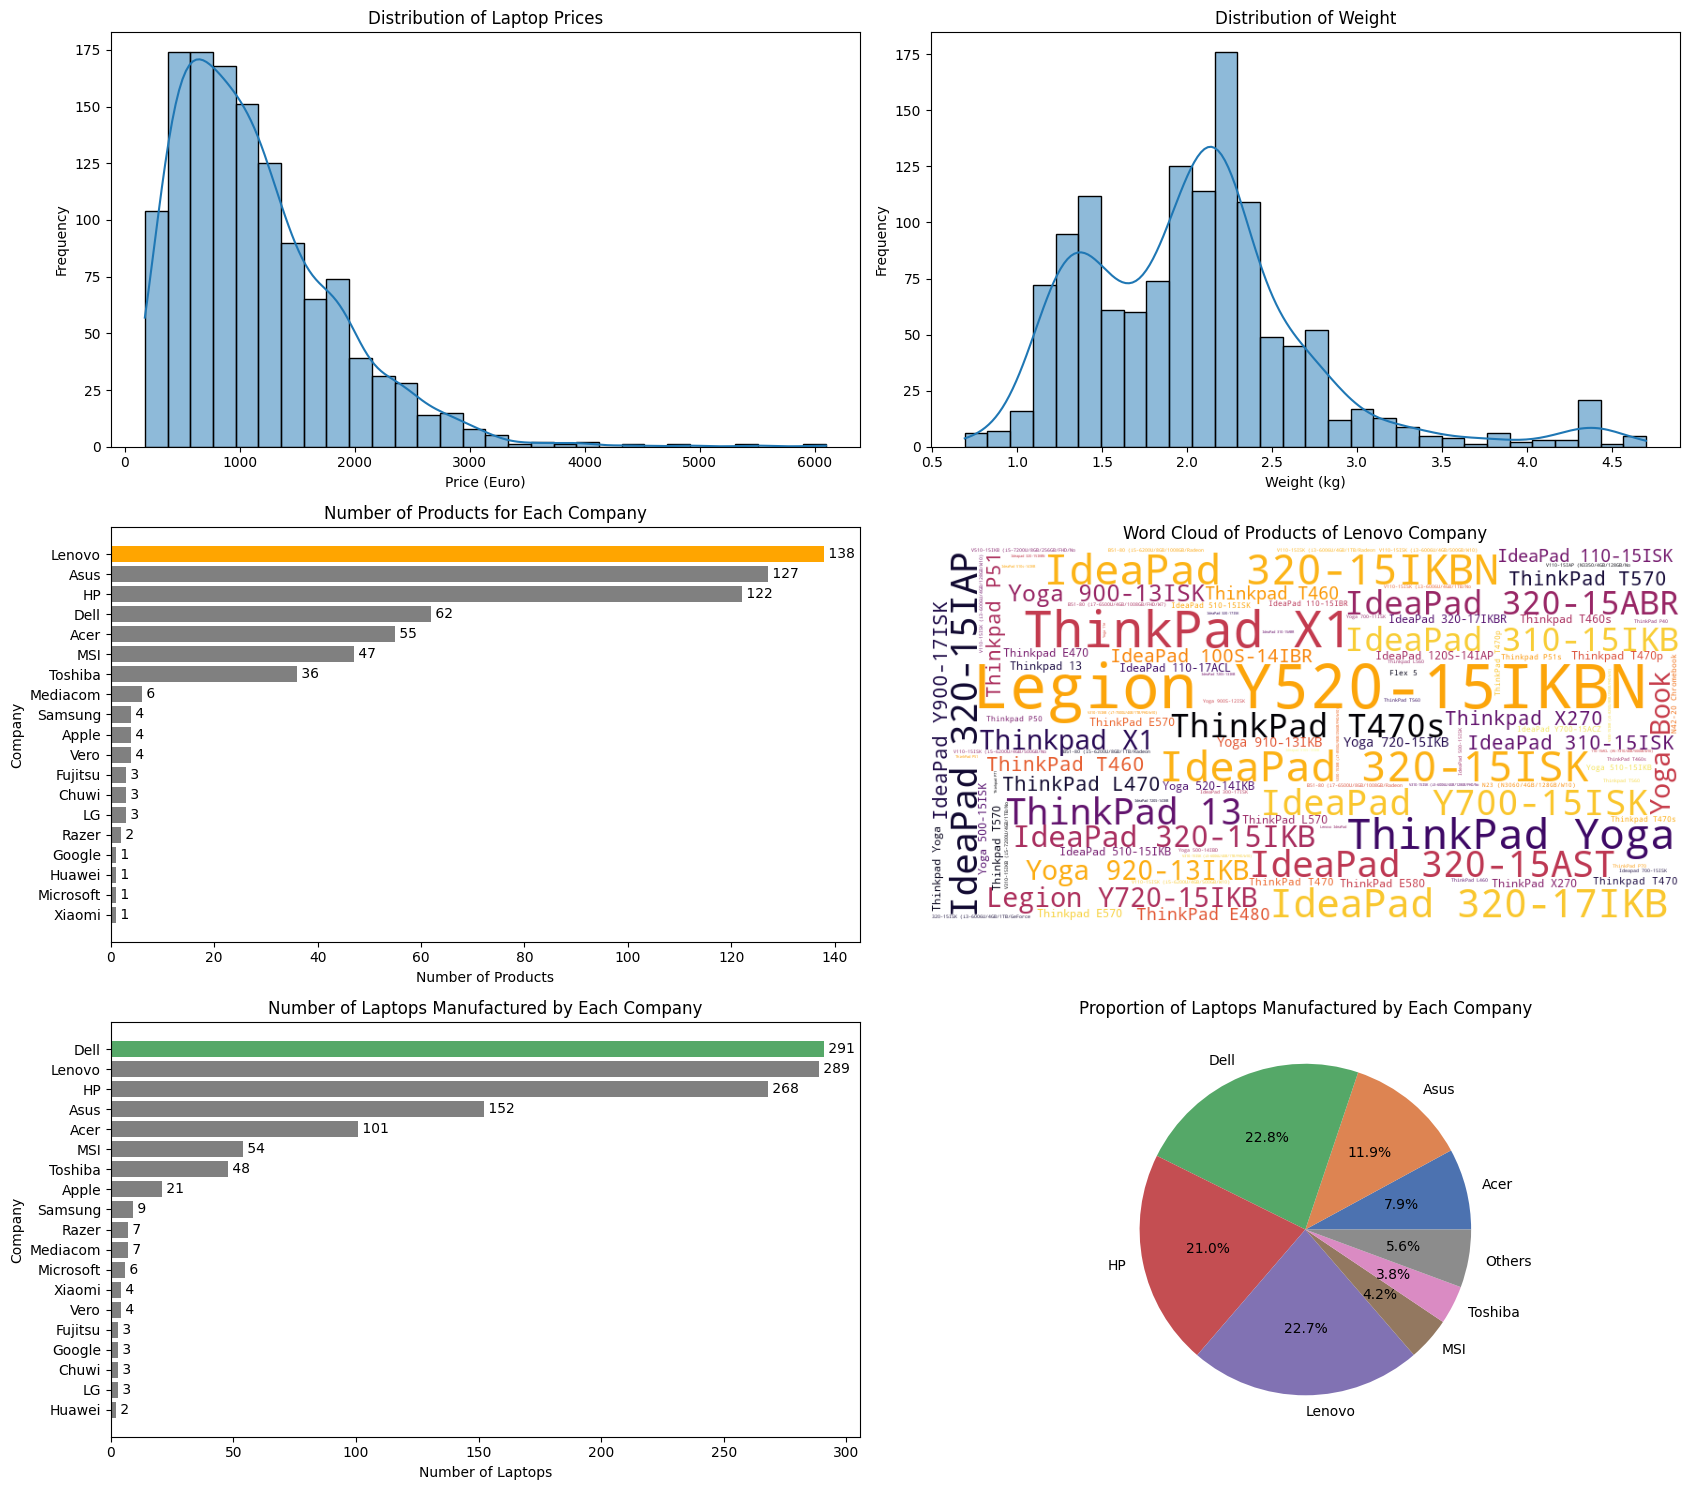

In [12]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 15))
axes = axes.flatten()

# Plot 1
sns.histplot(df['Price (Euro)'], kde=True, bins=30, ax=axes[0]) 
axes[0].set_title('Distribution of Laptop Prices') 
axes[0].set_xlabel('Price (Euro)')  
axes[0].set_ylabel('Frequency')  

# Plot 2
sns.histplot(df['Weight (kg)'], kde=True, bins=30, ax=axes[1])
axes[1].set_title('Distribution of Weight')
axes[1].set_xlabel('Weight (kg)')
axes[1].set_ylabel('Frequency')

# Plot 3
cmp_prd = df.groupby(by="Company")["Product"].nunique().sort_values()
plot_horizontal_bar(axes[2], 
                    cmp_prd, 
                    title="Number of Products for Each Company", 
                    xlabel='Number of Products', ylabel='Company',
                    color= ['gray'] * (len(cmp_prd) - 1) + ['orange'])

# Plot 4
lenovo_products_count = df[df["Company"] == "Lenovo"]["Product"].value_counts()
plot_WordCloud(axes[3], 
               lenovo_products_count, 
               title='Word Cloud of Products of Lenovo Company')

# Plot 5
company_device_count = df.groupby(by="Company").size().sort_values()
plot_horizontal_bar(axes[4], 
                    company_device_count, 
                    title='Number of Laptops Manufactured by Each Company', 
                    xlabel='Number of Laptops', ylabel='Company',
                    color= ['gray'] * (len(company_device_count) - 1) + [sns.color_palette('deep')[2]])

# Plot 6
device_count = df.groupby(by="Company").size()
threshold = 30  # "Others" category
others = device_count[device_count < threshold].sum()
device_count = device_count[device_count >= threshold]
device_count['Others'] = others

axes[5].pie(device_count.values, 
            labels=device_count.index, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('deep', len(device_count)))
axes[5].set_title('Proportion of Laptops Manufactured by Each Company')

plt.tight_layout() # prevents overlap
plt.show()

C:\Users\Soltanzadeh\AppData\Local\Temp\ipykernel_10824\2027394269.py:18: UserWarning: FixedFormatter should only be used together with FixedLocator
  axes[1].set_yticklabels(type_count.index, rotation=45)


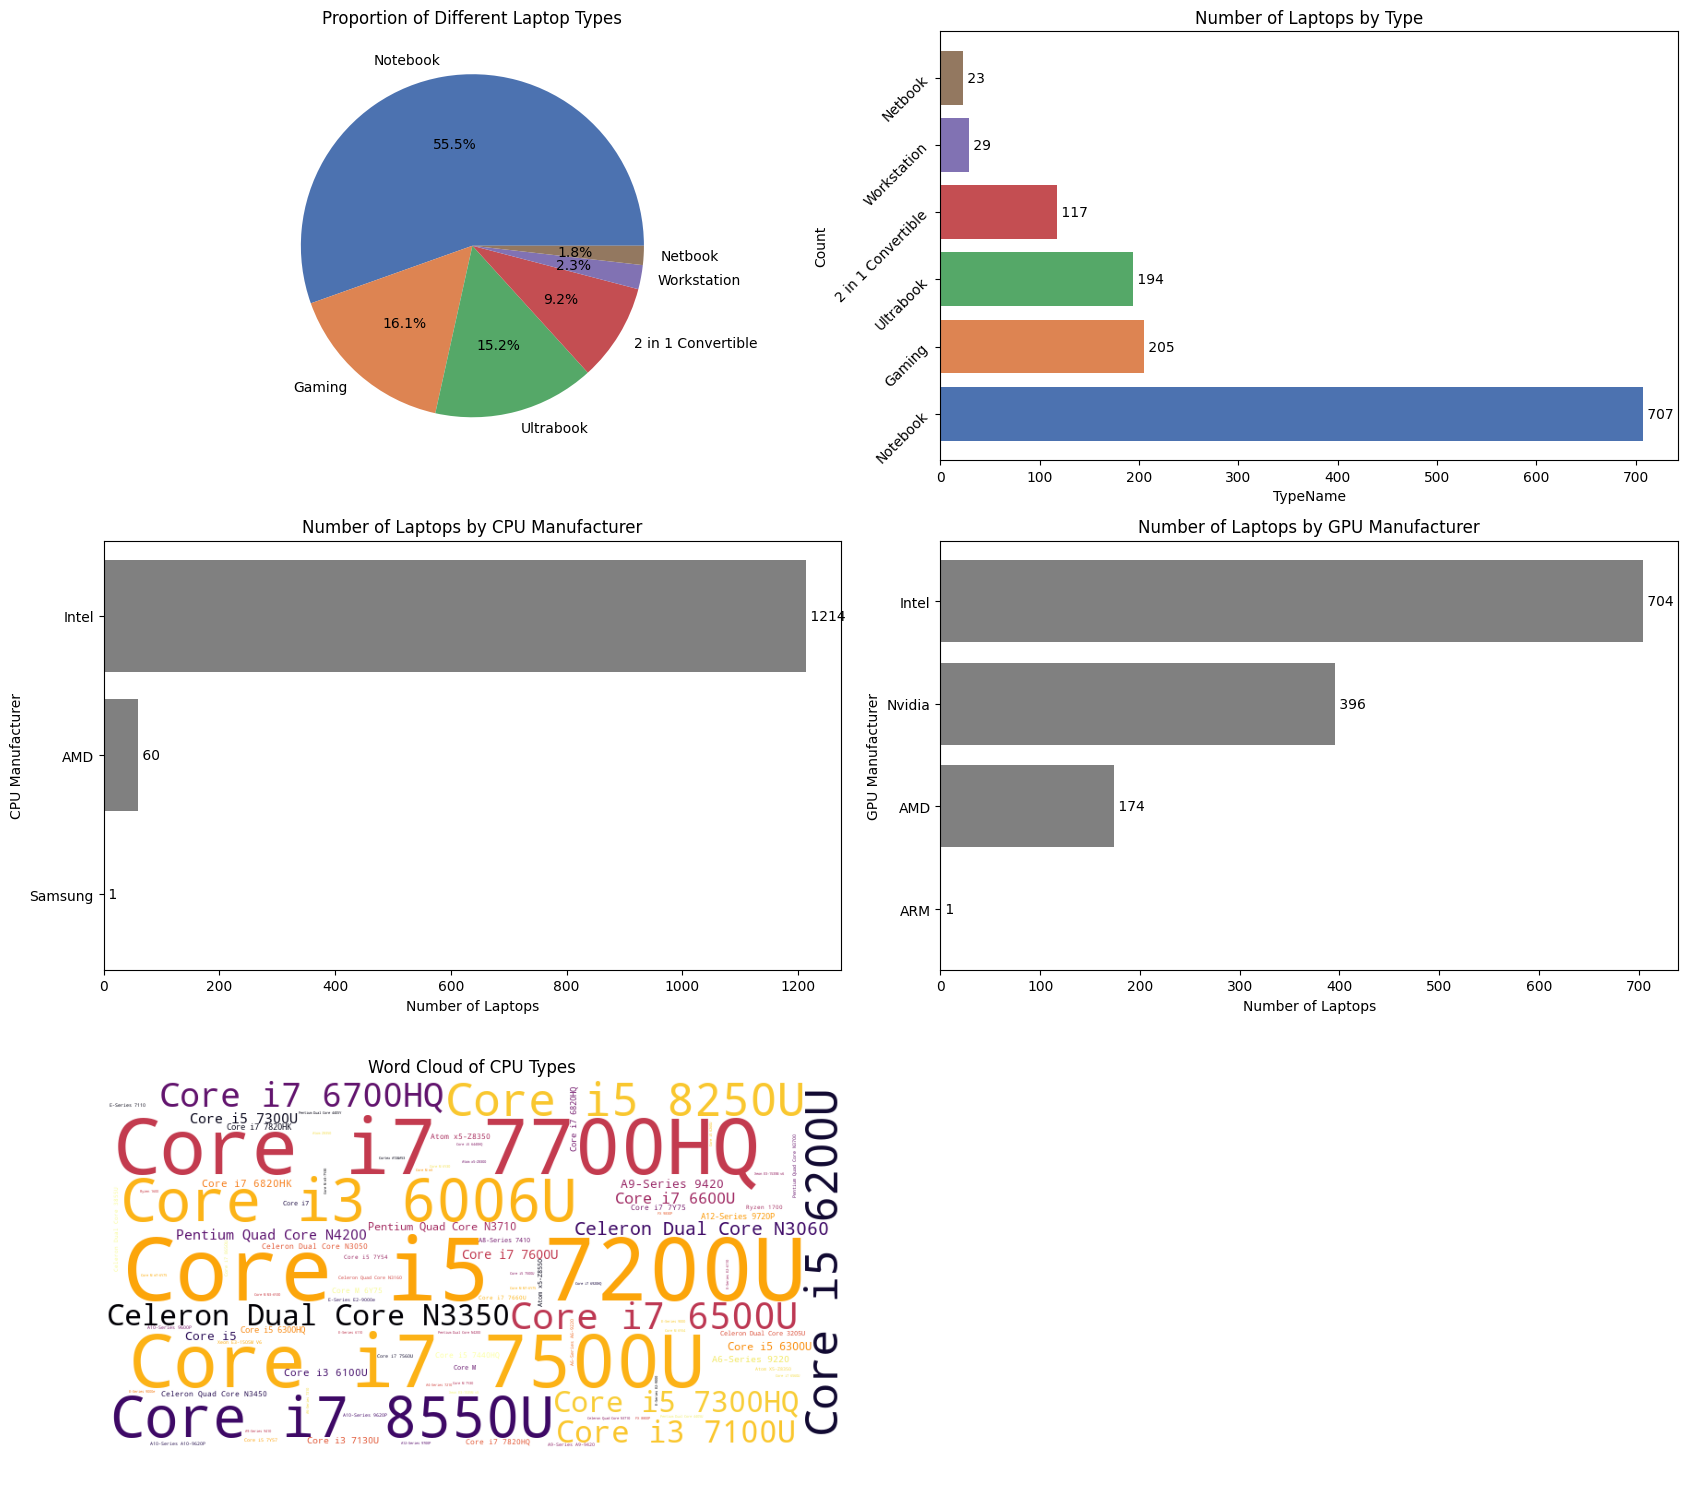

In [13]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(17, 15))
axes = axes.flatten()

# Plot 1
type_count = df['TypeName'].value_counts()
axes[0].pie(type_count.values, 
            labels=type_count.index, 
            autopct='%1.1f%%', 
            colors=sns.color_palette('deep', len(type_count))) 
axes[0].set_title('Proportion of Different Laptop Types')

# Plot 2
plot_horizontal_bar(axes[1], 
                    type_count, 
                    title='Number of Laptops by Type', 
                    xlabel='TypeName', ylabel='Count',
                    color= sns.color_palette('deep'))
axes[1].set_yticklabels(type_count.index, rotation=45)

#Plot 3
cpu_company_count = df["CPU_Company"].value_counts(ascending=True)
plot_horizontal_bar(axes[2], 
                    cpu_company_count, 
                    title='Number of Laptops by CPU Manufacturer', 
                    xlabel='Number of Laptops', ylabel='CPU Manufacturer')

# Plot 4
gpu_company_count = df["GPU_Company"].value_counts().sort_values()
plot_horizontal_bar(axes[3], 
                    gpu_company_count, 
                    title='Number of Laptops by GPU Manufacturer', 
                    xlabel='Number of Laptops', ylabel='GPU Manufacturer')

# Plot 5
cpu_type_counts = df["CPU_Type"].value_counts()
plot_WordCloud(axes[4], 
               cpu_type_counts, 
               title='Word Cloud of CPU Types')

axes[5].axis('off')
plt.tight_layout() 
plt.show()


2025-02-10 14:52:49,864 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-10 14:52:49,887 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-10 14:52:50,319 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-10 14:52:50,337 - INFO - Using categorical units to plot a list of strings that are all parsable as floats or dates. If these strings should be plotted as numbers, cast to the appropriate data type before plotting.
2025-02-10 14:52:50,683 - INFO - Using categorical units to plot a list of strings that are all parsable as 

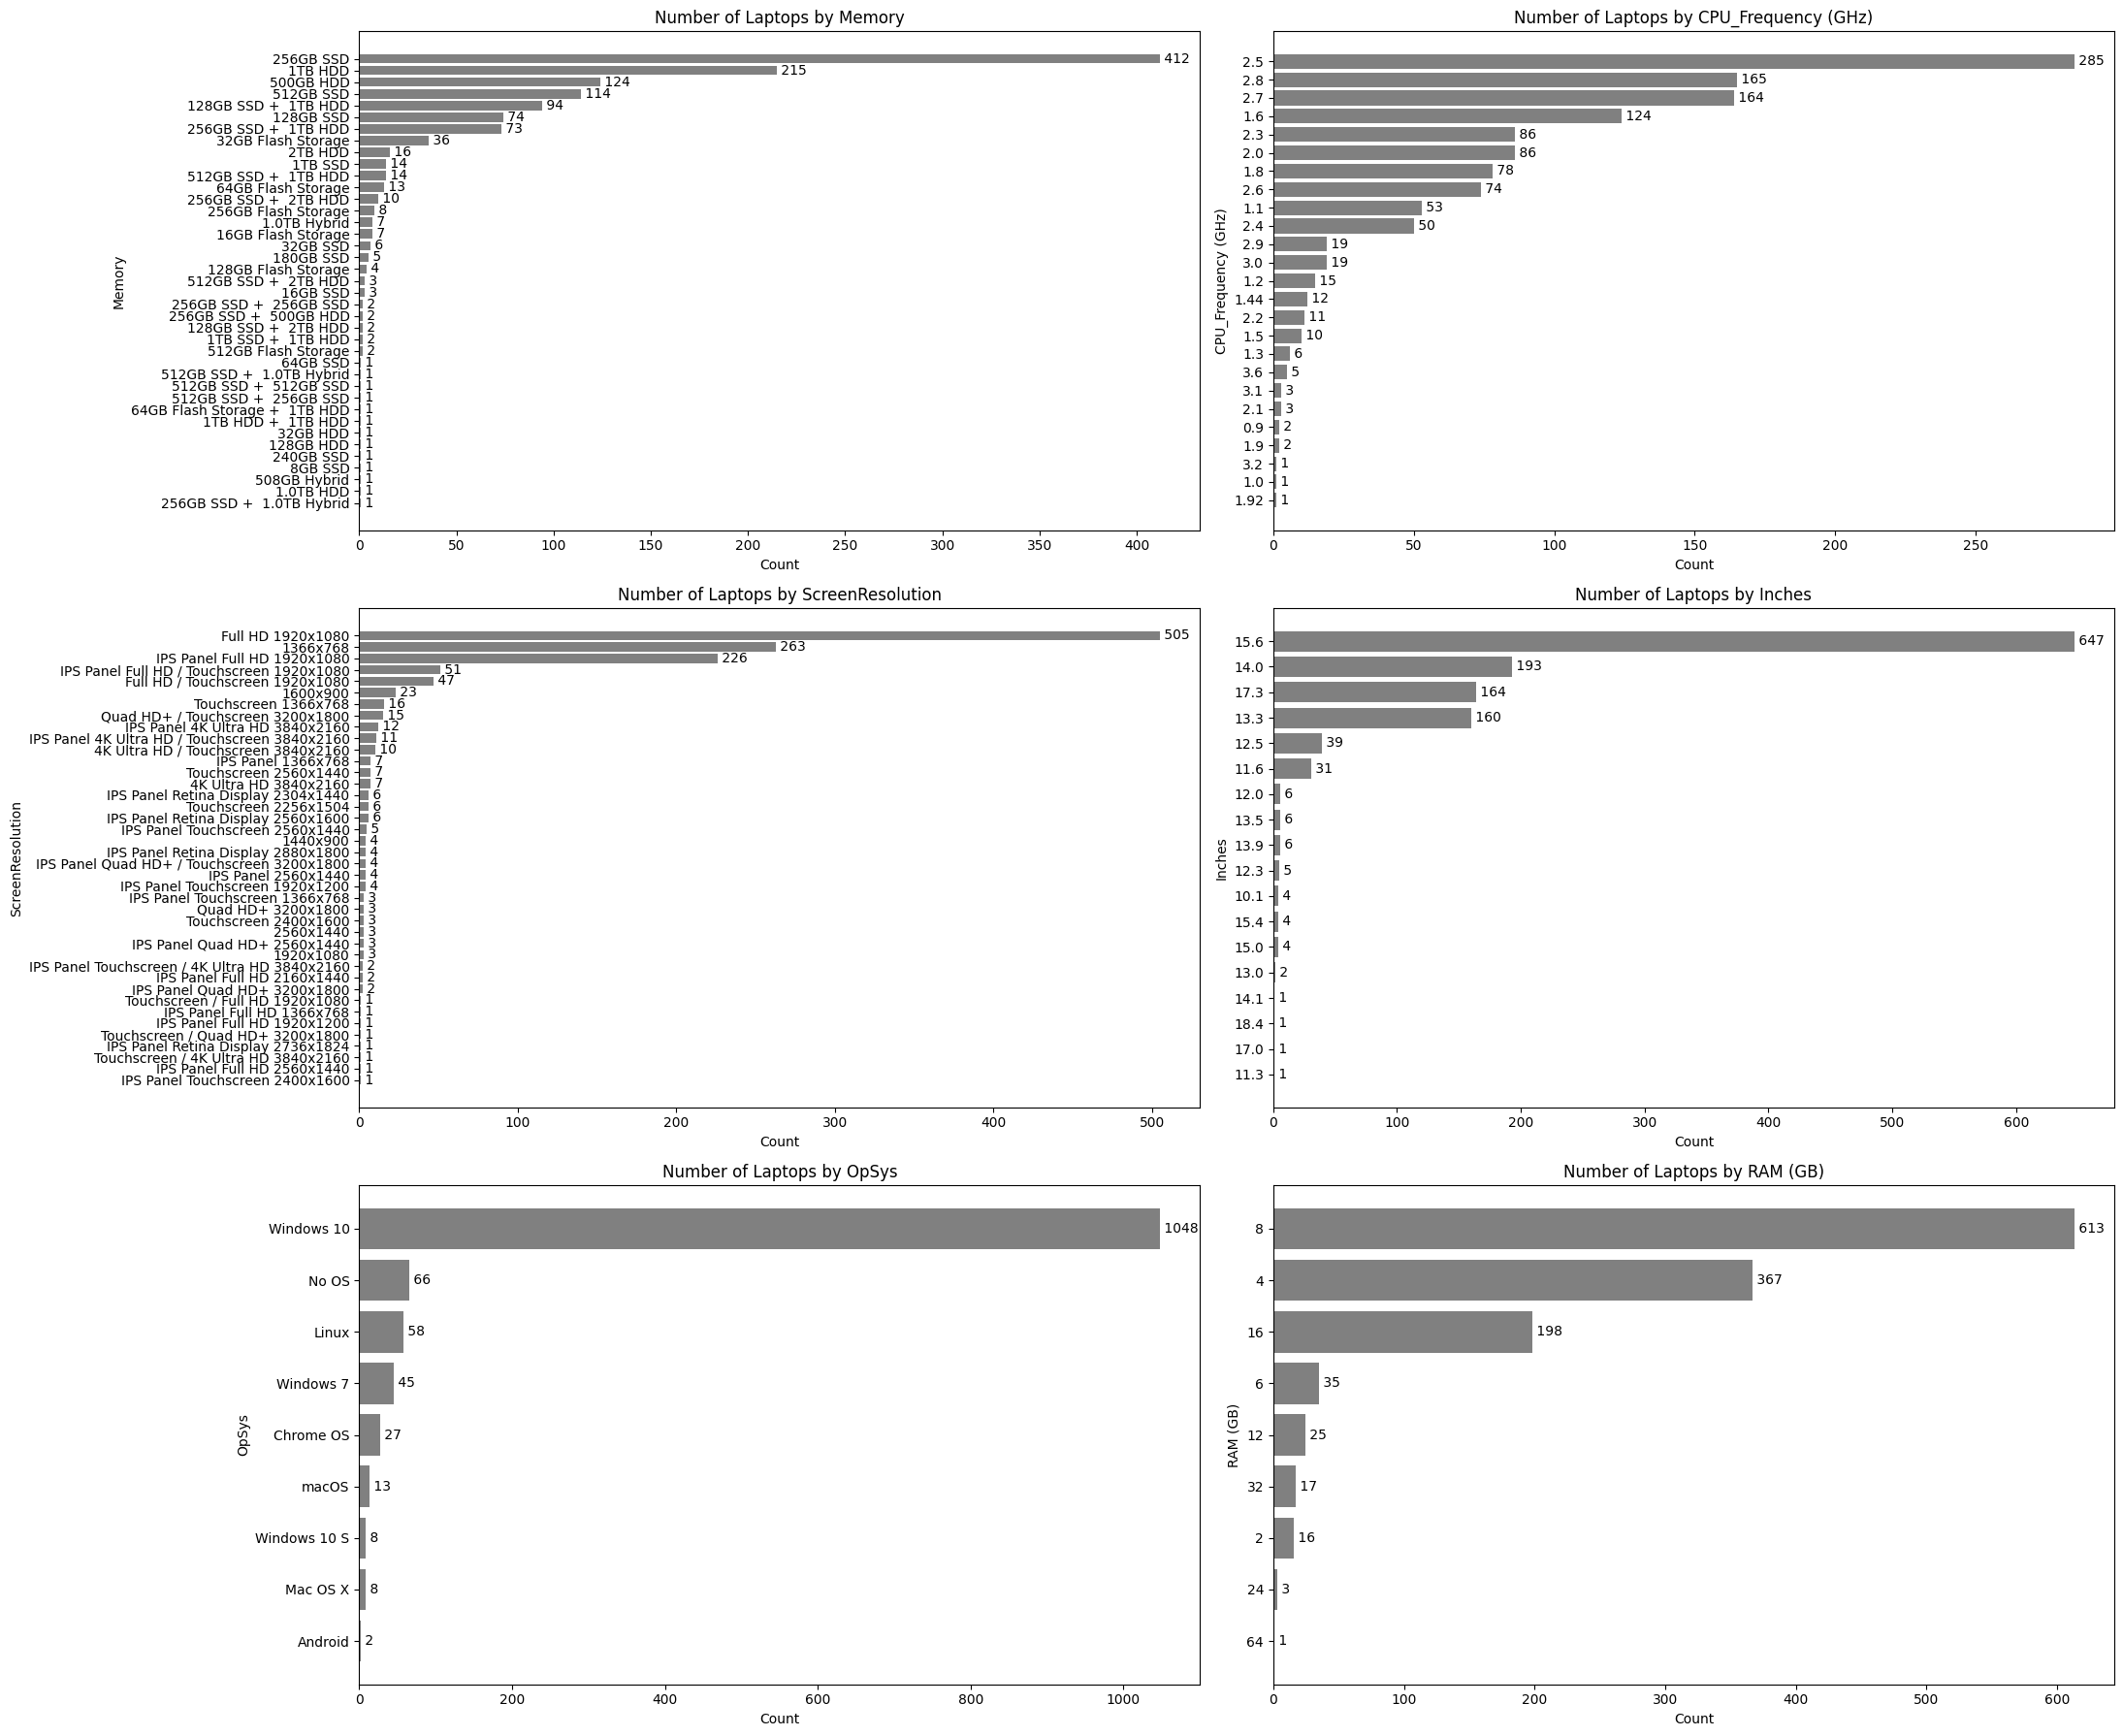

In [14]:
fig, axes = plt.subplots(nrows=3, ncols=2, figsize=(22, 18))
axes = axes.flatten()

for i, column in enumerate(["Memory", "CPU_Frequency (GHz)", "ScreenResolution", "Inches", "OpSys", "RAM (GB)"]):
    data = df[column].value_counts(ascending=True)
    plot_horizontal_bar(axes[i], 
                        data.rename(index=str), 
                        title=f'Number of Laptops by {column}', 
                        xlabel='Count', ylabel=column)

plt.tight_layout() 
plt.show()

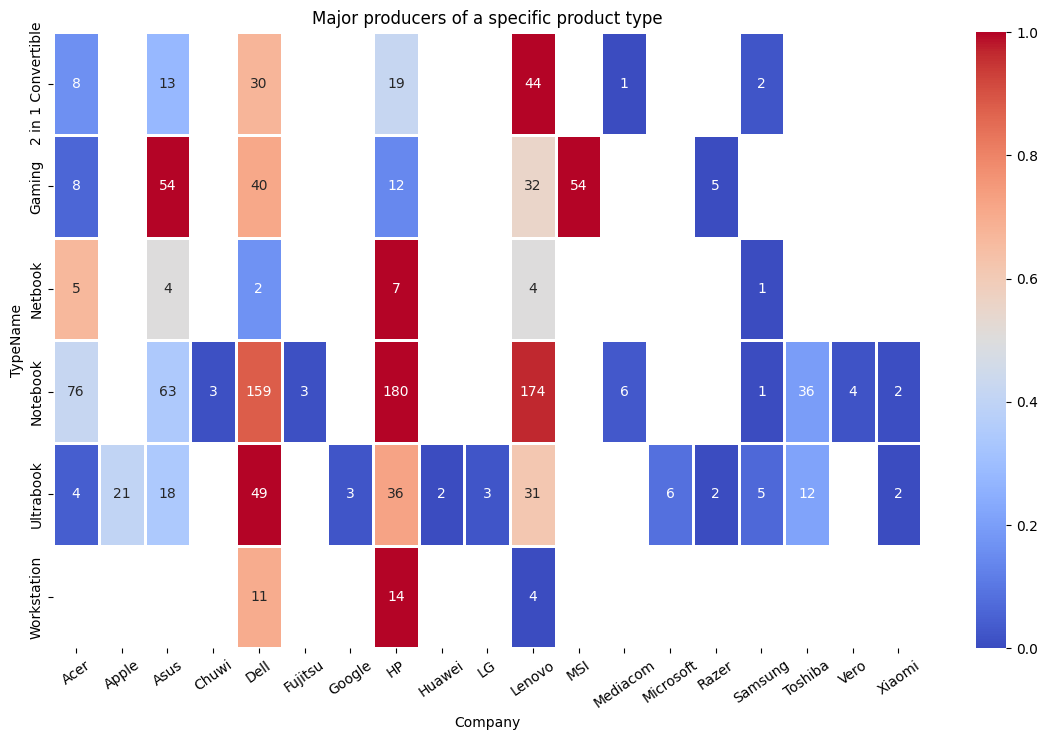

In [85]:
mp_pt = df.groupby(['TypeName', 'Company']).size().unstack()

# Normalize each row
# This to insure that color intensity is calculated independently for each row
normalized_data = mp_pt.apply(lambda x: (x - np.min(x)) / (np.max(x) - np.min(x)), axis=1)

plt.figure(figsize=(14, 8))
sns.heatmap(normalized_data, annot=mp_pt, fmt=".0f", cmap="coolwarm", cbar=True, linewidths=2)
plt.title("Major producers of a specific product type")
plt.xlabel("Company")
plt.ylabel("TypeName")
plt.xticks(rotation=35)
plt.show()

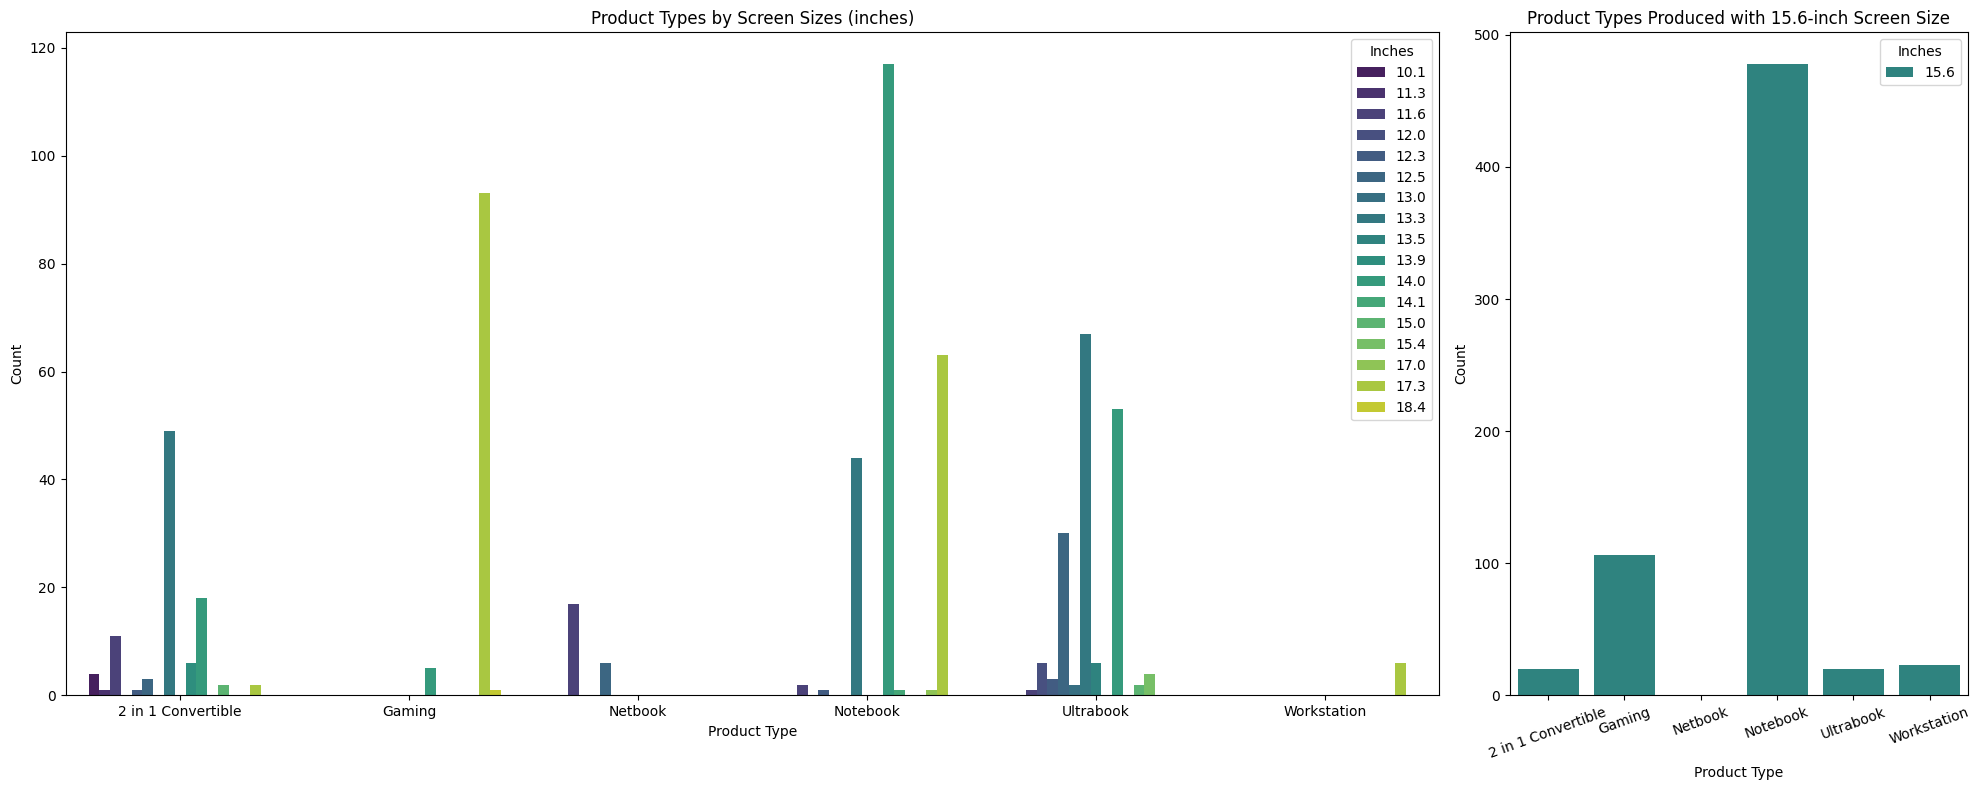

In [86]:
inch_pt = df.groupby(['TypeName', 'Inches']).size().unstack()
inch_pt_melted = inch_pt.reset_index().melt(id_vars="TypeName", var_name="Inches", value_name="Count")
inch_pt_melted_15_6 = inch_pt_melted[inch_pt_melted['Inches'].isin([15.6])]
inch_pt_melted = inch_pt_melted[~inch_pt_melted['Inches'].isin([15.6])]

fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(20, 8), gridspec_kw={'width_ratios': [3, 1]})
# Plot 1: without 15.6-inch
plot_sns_bar(axes[0], inch_pt_melted, x="TypeName", y="Count", 
                        hue="Inches", legend= True,
                        title="Product Types by Screen Sizes (inches)", xlabel="Product Type", ylabel="Count")
# Plot 2: for 15.6-inch
plot_sns_bar(axes[1], inch_pt_melted_15_6, x="TypeName", y="Count", 
                        hue="Inches", legend= True,
                        title="Product Types Produced with 15.6-inch Screen Size", xlabel="Product Type", ylabel="Count")
axes[1].tick_params(axis='x', rotation=20)

plt.tight_layout()
plt.show()


In [ ]:
def plot_sns_bar(axes, data, x, y, hue=None, legend=False, legLoc="upper right", title="", xlabel="", ylabel="", palette="viridis"):
    sns.barplot(data=data, x=x, y=y, hue=hue, palette=palette, ax=axes)
    axes.set_title(title)
    axes.set_xlabel(xlabel)
    axes.set_ylabel(ylabel)
    if legend:
        axes.legend(title=hue, loc=legLoc)
    

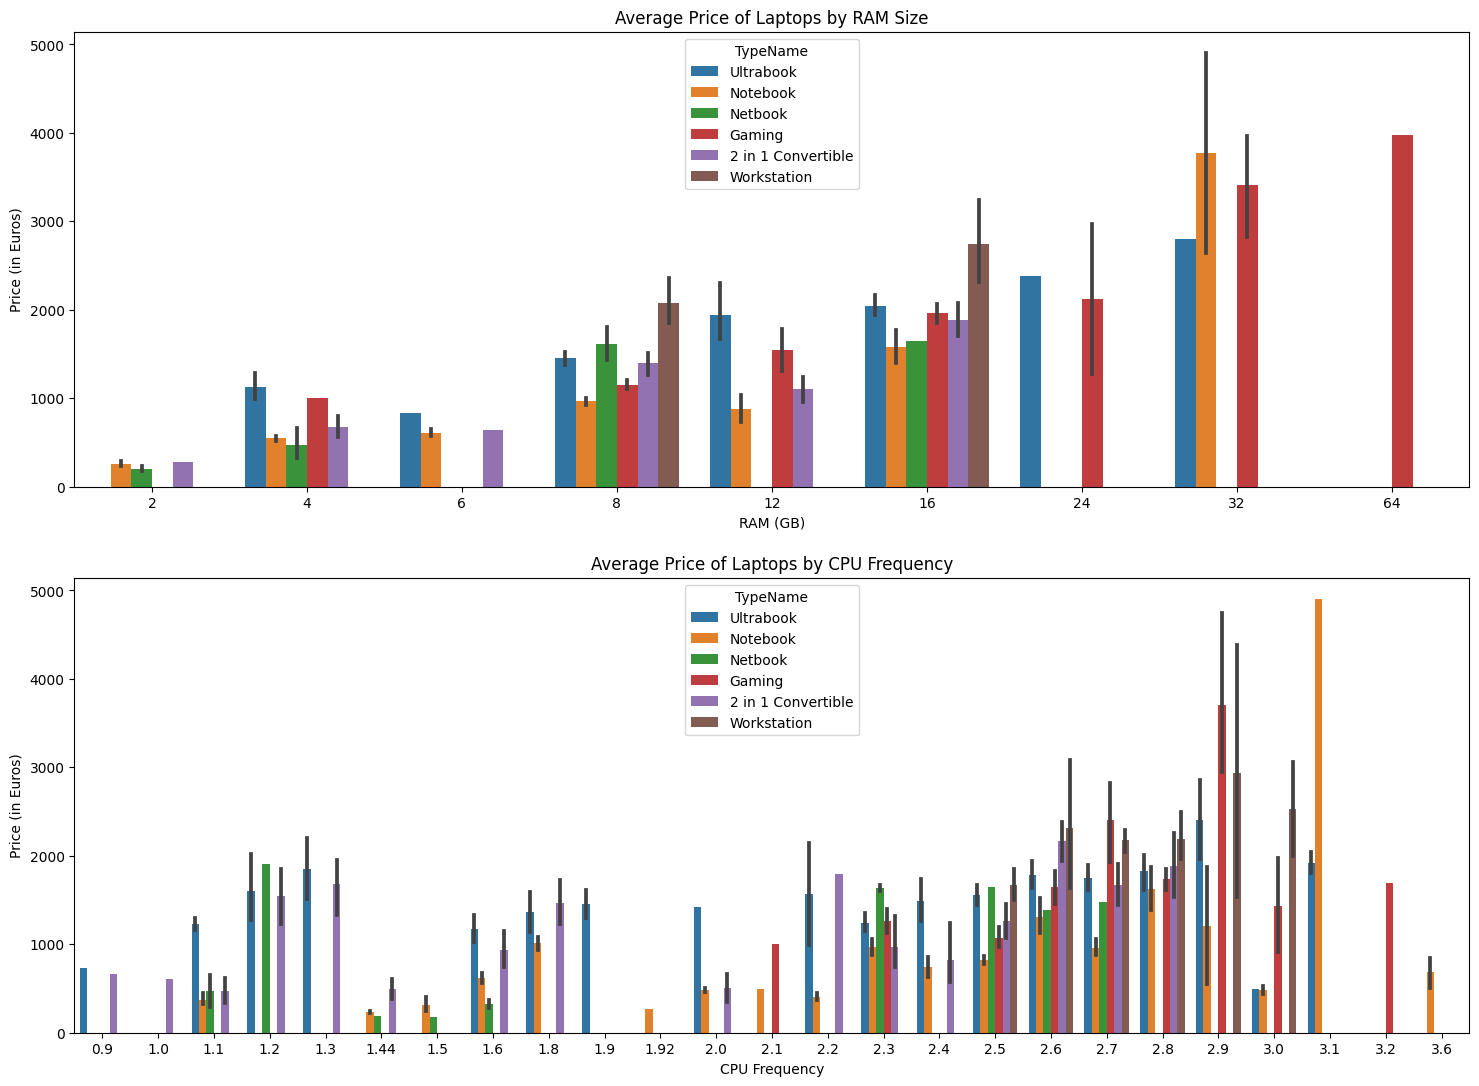

In [98]:
fig, axes = plt.subplots(nrows=2, figsize=(18, 13))

# Plot 1
plot_sns_bar(axes[0], df, x='RAM (GB)', y='Price (Euro)',
             hue='TypeName',legend=True, legLoc="upper center", palette="tab10",
             title='Average Price of Laptops by RAM Size', xlabel='RAM (GB)', ylabel='Price (in Euros)')

# Plot 2
plot_sns_bar(axes[1], df, x='CPU_Frequency (GHz)', y='Price (Euro)',
             hue='TypeName',legend=True, legLoc="upper center", palette="tab10",
             title='Average Price of Laptops by CPU Frequency', xlabel='CPU Frequency', ylabel='Price (in Euros)')

In [34]:
company_opSys = df.groupby(['Company', 'TypeName', 'OpSys']).size().reset_index(name='Count')

fig = px.bar(company_opSys, x="Company", y="Count", color="OpSys", 
              barmode="stack", facet_col="TypeName", 
              title="Stacked Bar Chart of Company, Product type and Operating Systems")
fig.show()


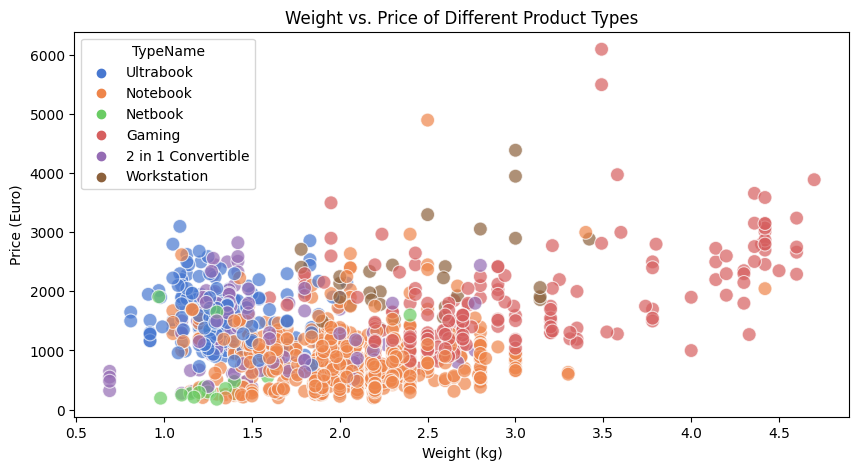

In [73]:
plt.figure(figsize=(10, 5))
sns.scatterplot(x='Weight (kg)', y='Price (Euro)', data=df, hue='TypeName', palette='muted', s=100, alpha=0.7)

plt.title('Weight vs. Price of Different Product Types')
plt.xlabel('Weight (kg)')
plt.ylabel('Price (Euro)')
plt.show()

In [60]:
df

,Company,Product,TypeName,Inches,ScreenResolution,CPU_Company,CPU_Type,CPU_Frequency (GHz),RAM (GB),Memory,GPU_Company,GPU_Type,OpSys,Weight (kg),Price (Euro)
0,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,2.3,8,128GB SSD,Intel,Iris Plus Graphics 640,macOS,1.37,1339.69
1,Apple,Macbook Air,Ultrabook,13.3,1440x900,Intel,Core i5,1.8,8,128GB Flash Storage,Intel,HD Graphics 6000,macOS,1.34,898.94
2,HP,250 G6,Notebook,15.6,Full HD 1920x1080,Intel,Core i5 7200U,2.5,8,256GB SSD,Intel,HD Graphics 620,No OS,1.86,575.00
3,Apple,MacBook Pro,Ultrabook,15.4,IPS Panel Retina Display 2880x1800,Intel,Core i7,2.7,16,512GB SSD,AMD,Radeon Pro 455,macOS,1.83,2537.45
4,Apple,MacBook Pro,Ultrabook,13.3,IPS Panel Retina Display 2560x1600,Intel,Core i5,3.1,8,256GB SSD,Intel,Iris Plus Graphics 650,macOS,1.37,1803.60
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1270,Lenovo,Yoga 500-14ISK,2 in 1 Convertible,14.0,IPS Panel Full HD / Touchscreen 1920x1080,Intel,Core i7 6500U,2.5,4,128GB SSD,Intel,HD Graphics 520,Windows 10,1.80,638.00
1271,Lenovo,Yoga 900-13ISK,2 in 1 Convertible,13.3,IPS Panel Quad HD+ / Touchscreen 3200x1800,Intel,Core i7 6500U,2.5,16,512GB SSD,Intel,HD Graphics 520,Windows 10,1.30,1499.00
1272,Lenovo,IdeaPad 100S-14IBR,Notebook,14.0,1366x768,Intel,Celeron Dual Core N3050,1.6,2,64GB Flash Storage,Intel,HD Graphics,Windows 10,1.50,229.00
1273,HP,15-AC110nv (i7-6500U/6GB/1TB/Radeon,Notebook,15.6,1366x768,Intel,Core i7 6500U,2.5,6,1TB HDD,AMD,Radeon R5 M330,Windows 10,2.19,764.00


<Axes: >

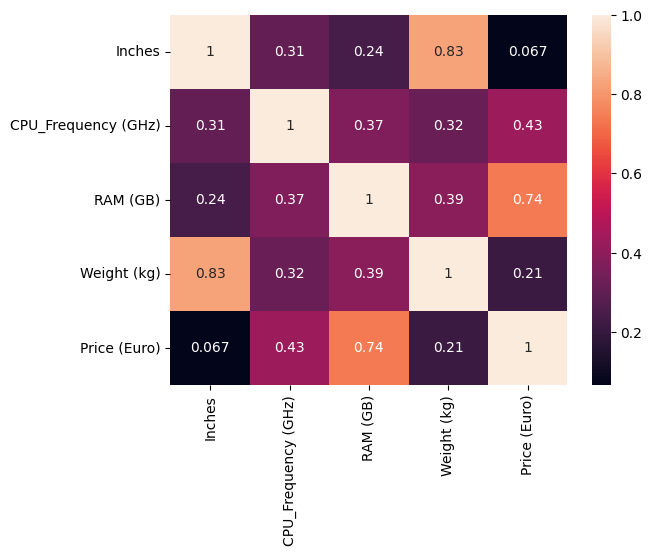

In [29]:
sns.heatmap(df[numerical_columns].corr(), annot=True)

### Feature Engineering

In [ ]:
df["Inches-Weight Ratio"] = df['Inches'] / df['Weight (kg)']

In [11]:
df_train = shuffle(df_train, random_state=1)

# (60% train, 20% val, 20% test)
train_set, temp_set = train_test_split(df_train, test_size=0.4, random_state=1)
val_set, test_set = train_test_split(temp_set, test_size=0.5, random_state=1)